# Customer Personality Analysis

#### Group 7 Members: Tustin Choa, Margaret Inguillo, Ryan Villanueva

## Notebook Setting Up

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [129]:
stats_df = pd.read_csv("marketing_campaign.csv", sep="\t")

## Data Representation

In [130]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

This dataset is about customer personality types. It contains 2240 observations and 29 variables. These variables are grouped into 4 major categories: People, products, promotion, and place. The dataset was created in order to help companies create products that may be sold to a certain group of people with similar traits. It was likely that the information was gathered through the company's website in the form of cookies, as well as, through membership data. 

Listed below are the variables per category and their interpretation:                           
**People**                                   
ID: Unique number assigned to every customer                               
Year_Birth: Customer's year of birth                                   
Education: Customer's education attainment                             
Marital_Status: Customer's marital status                                
Income: Customer's yearly income                                  
Kidhome: Number of children a customer has                                                       
Teenhome: How many of the children are teenagers                            
Dt_Customer: Customer's date of enrollment at the company                     
Recency: Number of days since customer's last purchase                                
Complain: 1 if a complain was made by the customer in the last 2 years , 0 otherwise                      

**Products**                                                            
MntWines: Expenses on wine in the last 2 years                 
MntFruits: Expenses on fruits in the last 2 years                                    
MntMeatProducts: Expenses on meat in the last 2 years                                   
MntFishProducts: Expenses on fish in the last 2 years                                           
MntSweetProducts: Expenses on sweets the in last 2 years                            
MntGoldProds: Expenses on gold in the last 2 years                       

**Promotion**                                     
NumDealsPurchases: The number of discounted purchases
AcceptedCmp1: 1 if customer bought an offer in the 1st campaign, 0 otherwise                    
AcceptedCmp2: 1 if customer bought an offer in the 2nd campaign, 0 otherwise                     
AcceptedCmp3: 1 if customer bought an offer in the 3rd campaign, 0 otherwise                     
AcceptedCmp4: 1 if customer bought an offer in the 4th campaign, 0 otherwise                              
AcceptedCmp5: 1 if customer bought an offer in the 5th campaign, 0 otherwise                             
Response: 1 if customer bought an offer in the 6th campaign, 0 otherwise                     

**Place**                                          
NumWebPurchases: The number of online purchases                                    
NumCatalogPurchases: The number of purchases through a catalogue                               
NumStorePurchases: The number of purchases made directly in stores                             
NumWebVisitsMonth: The number of visits to company’s web site in the last month 
 

## Data Cleaning

A sample size of 100 random observations was taken from the 2240 total observations for this study

In [119]:
n = 100 # sample size
sample_stats_df = stats_df.sample(n, random_state=8)

Missing values were checked for and none were found

In [131]:
sample_stats_df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
Total_Children         False
dtype: bool

Dropping variables that won't be used for this notebook

In [132]:
sample_stats_df.loc[:, ~sample_stats_df.columns.isin(['Z_Revenue', 'Z_CostContact', 'MntGoldProds'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Children
1834,10521,1977,Graduation,Married,54809.0,1,1,11-09-2013,0,63,...,5,4,0,0,0,0,0,0,1,2
2138,2948,1954,Master,Divorced,62637.0,0,1,01-03-2014,76,104,...,5,2,0,0,0,0,0,0,0,1
314,3050,1966,Graduation,Married,54198.0,1,1,17-12-2013,13,185,...,6,4,0,0,0,0,0,0,0,2
1460,8233,1950,Master,Widow,64866.0,0,1,26-01-2014,9,508,...,7,5,0,1,0,0,0,0,0,1
1511,9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,...,2,8,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2258,1986,Graduation,Married,32880.0,1,0,04-12-2012,76,8,...,3,8,0,0,0,0,0,0,0,1
835,9904,1956,Graduation,Married,71391.0,0,1,29-03-2013,50,336,...,12,3,0,0,0,0,0,0,0,1
684,6327,1967,Graduation,Together,65777.0,0,0,19-12-2013,87,565,...,6,1,0,0,0,0,0,0,0,0
1509,10128,1958,Graduation,Together,53977.0,0,1,08-06-2013,21,620,...,12,5,0,0,0,0,0,0,0,1


Checking for inconsistencies in data

In [122]:
sample_stats_df["Education"].unique()

array(['Graduation', 'Master', 'PhD', '2n Cycle', 'Basic'], dtype=object)

In [123]:
sample_stats_df["Marital_Status"].unique()

array(['Married', 'Divorced', 'Widow', 'Single', 'Together'], dtype=object)

## Exploratory Data Analysis

Shows the first 10 observations from the dataset

In [72]:
sample_stats_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_exp,total_kt_hh,total_cmp,has_kid_teen
1317,4937,1973,2n Cycle,Married,46094.0,1,1,10-06-2014,62,12,...,0,0,0,3,11,0,39,2,0,1
1175,1604,1960,Master,Married,47353.0,0,1,13-11-2013,93,184,...,0,0,0,3,11,0,221,1,0,1
1451,6652,1965,Graduation,Married,77343.0,0,0,09-06-2014,28,227,...,0,0,0,3,11,0,1103,0,0,0
1010,5236,1979,Graduation,Together,77568.0,0,1,25-08-2012,30,1230,...,1,0,0,3,11,0,2036,1,3,1
2158,5186,1955,PhD,Married,58482.0,0,1,12-03-2014,59,576,...,0,0,0,3,11,0,724,1,1,1
1757,3524,1971,Master,Single,39763.0,1,0,04-08-2013,9,80,...,0,0,0,3,11,1,151,1,1,1
463,7059,1963,Graduation,Married,80124.0,0,0,26-06-2014,47,483,...,0,0,0,3,11,0,1254,0,1,0
1271,7488,1963,Master,Single,64191.0,0,1,22-01-2013,30,420,...,0,0,0,3,11,0,810,1,0,1
408,5049,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,0,3,11,0,44,1,0,1
956,5748,1965,Graduation,Married,59754.0,0,1,01-12-2012,96,115,...,0,0,0,3,11,1,336,1,1,1


### Education


Categorizes people by their educational attainment


In [51]:
edu_group_count = sample_stats_df.groupby(["Education"])['ID'].count()
edu_group_count

Education
2n Cycle       7
Basic          5
Graduation    49
Master        15
PhD           24
Name: ID, dtype: int64

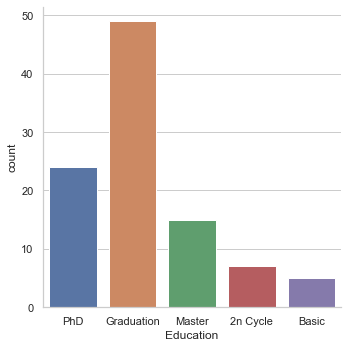

In [50]:
sns.set_theme(style="whitegrid")

edu_plot = sns.catplot(x="Education", kind="count", order=['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'], data=sample_stats_df)

Computes for average income per educational attainment type

In [52]:
edu_income_df=sample_stats_df.groupby(["Education"])["Income"].mean()
edu_income_df

Education
2n Cycle      61259.714286
Basic         26659.600000
Graduation    62142.122449
Master        49447.333333
PhD           52871.291667
Name: Income, dtype: float64

### Marital Status

Checks for inconsistencies in `Marital_Status`

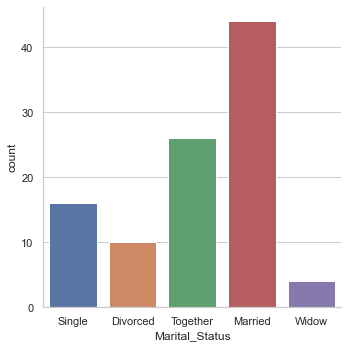

In [55]:
sns.set_theme(style="whitegrid")

edu_plot = sns.catplot(x="Marital_Status", kind="count", order=['Single', 'Divorced', 'Together', 'Married', 'Widow'], data=sample_stats_df)

Computes for average income per marital status type

In [56]:
ms_income_df=sample_stats_df.groupby(["Marital_Status"])["Income"].agg(['mean', 'count'])
ms_income_df=ms_income_df.rename(columns={"mean": "ave_income", "count": "total_indv"}, errors="raise")
ms_income_df

,ave_income,total_indv
Marital_Status,,
Divorced,75658.000000,10
Married,55368.613636,44
Single,53983.937500,16
Together,53173.461538,26
Widow,44662.250000,4


## Expenses
Combines fields related to expenses on food

In [91]:
sample_stats_df["Total_Exp"] = sample_stats_df['MntWines'] + sample_stats_df['MntFruits'] + sample_stats_df['MntMeatProducts'] + sample_stats_df['MntFishProducts'] + sample_stats_df['MntSweetProducts']
sample_stats_df[["MntWines","MntFruits","MntMeatProducts","MntFishProducts", "MntSweetProducts", "Total_Exp"]]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Total_Exp
1317,12,2,20,3,2,39
1175,184,2,19,8,8,221
1451,227,151,573,98,54,1103
1010,1230,0,396,232,178,2036
2158,576,7,115,19,7,724
...,...,...,...,...,...,...
2009,561,14,113,10,14,712
1899,378,14,68,19,14,493
603,410,16,114,0,5,545
197,519,17,813,27,173,1549


## Children 
Combines fields to get the number of children a customer has


In [125]:
sample_stats_df["Total_Children"] = sample_stats_df["Kidhome"] + sample_stats_df["Teenhome"]
Children_group_count = sample_stats_df.groupby(["Total_Children"])['ID'].count()
Children_group_count

Total_Children
0    33
1    46
2    17
3     4
Name: ID, dtype: int64

In [126]:
sample_stats_df["Total_Children"].unique()

array([2, 1, 0, 3], dtype=int64)

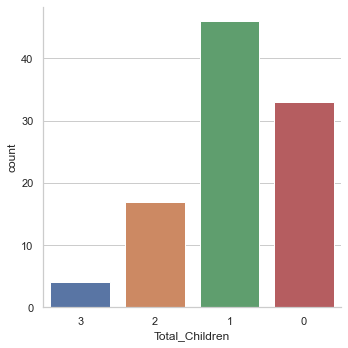

In [127]:
sns.set_theme(style="whitegrid")

edu_plot = sns.catplot(x="Total_Children", kind="count", order=[3,2,1,0], data=sample_stats_df)

## Campaigns
Shows number of campaigns attended by a customer

In [134]:
sample_stats_df["Total_Cam"] = sample_stats_df["AcceptedCmp3"] + sample_stats_df["AcceptedCmp4"] + sample_stats_df["AcceptedCmp5"] + sample_stats_df["AcceptedCmp1"] + sample_stats_df["AcceptedCmp2"] + sample_stats_df["Response"]
sample_stats_df["Total_Cam"].unique()

array([1, 0, 2, 3, 4], dtype=int64)

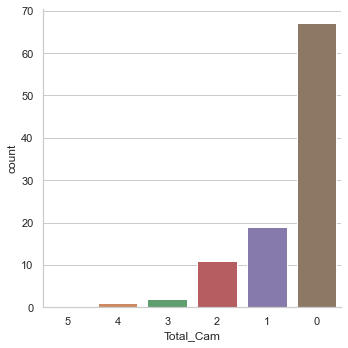

In [135]:
edu_plot = sns.catplot(x="Total_Cam", kind="count", order=[5,4,3,2,1,0], data=sample_stats_df)

**Relationship of Number of Children to Total Expenses**

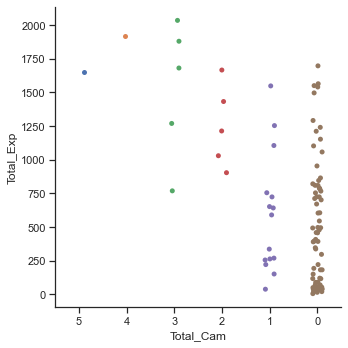

In [109]:
sample_stats_df[["Total_Cam", "Total_Exp"]]
edu_plot = sns.catplot(x="Total_Cam", y="Total_Exp", order=[5,4,3,2,1,0], data=sample_stats_df)

**Relationship of Number of Campaigns Attended to Total Expenses**

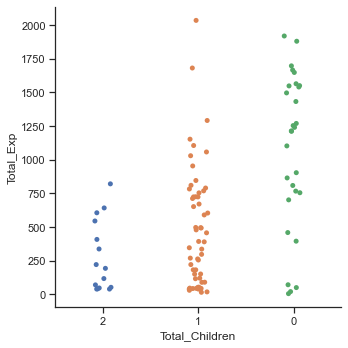

In [107]:
sample_stats_df[["Total_Children", "Total_Exp"]]
edu_plot = sns.catplot(x="Total_Children", y="Total_Exp", order=[2,1,0], data=sample_stats_df)

## Research Question

1. Does the number of campaigns attended affect the amount spent on grocery products?
2. 
3. 

## Statistical Inference

In [63]:
stats_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


## Insights and Conclusions